**Задача 1** 

Для каждой из 4-х матриц в приложенных файлах сделайте следующее:
1. Изучите свойства матрицы:
    * проверьте, является ли матрица симметричной или нет
    * постройте рисунок, где цветом показаны модули элементов матриц (или логарифм модулей), попробуйте понять, есть ли у матрицы структура
    * напечатайте сечения матриц, посмотрите на элементы
    
    Напишите отдельную функцию, которая строит необходимые графики и выводит нужную информацию.

2. Выберите подходящий метод-ускоритель из набора крыловских методов ([GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html), [MINRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.minres.html), [CG](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html), [BiCGStab](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.bicgstab.html))
3. Выберите подходящий предобуславливатель из методов простой итерации, или придумайте свой. Применение предобуславливателя должно стоить примерно $n^2$ операций или меньше. Можно использовать неоптимальные реализации предобуславливателя, главное, чтобы теоретическая оценка числа операций была не больше $C n^2$.
4. Реализуйте линейные операторы, задающие предобуславливатели.
5. Запустите крыловский метод с выбранным вами предобуславливателем, постройте график зависимости логарифма относительной ошибки от номера итерации (учтите, что в методах с рестартами нужно умножить число итераций на число рестартов). Точное решение найдите с помощью прямого метода.
6. Поварьируйте параметры, чтобы добиться как можно меньшего числа итераций для достижения относительной ошибки $10^{-8}$.

Известно, что $A_2$ - положительно определенная

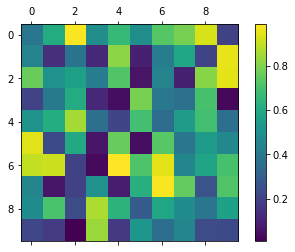

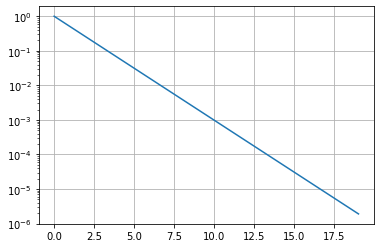

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import sparse as scp_sps
from scipy.sparse import linalg as scp_sps_la
from numba import jit, njit
import time

# Так можно считать матрицу из файла
A1 = np.loadtxt('A1_matrix.txt')

# Так можно визуализировать элементы
A = np.random.rand(10, 10)
fig, ax = plt.subplots()
cax = ax.matshow(np.abs(A))
cbar = fig.colorbar(cax)
plt.show()

# Так можно реализовать предобуславливатель
# Функция которая вычисляет P^-1
n = 10
def P_inv_fun(x):
    I = np.eye(x.shape[0])
    return I @ x

# Потом создаётся линейный оператор, который подаётся на вход в функции из scipy
P_inv_operator = scp_sps_la.LinearOperator((n, n), P_inv_fun)

# Подобную функцию нужно передать как аргумент callback, 
# чтобы сохранять ошибки на каждой итерации 
errors = []
x_exact = np.zeros(n)

def save_errors(x):
    # x - решение на текущей итерации
    errors.append(np.linalg.norm(x - x_exact) / np.linalg.norm(x_exact))
    return

# График в логарифмической шкале
plt.semilogy(np.arange(20), 2.**-(np.arange(20)))
plt.grid(True)

**Задача 2** (1 балл)

Обратите внимание, что матрица $A_3$ "почти" симметричная. Придумайте итерационный метод, в котором можно использовать базовые итерационные методы, предназначенные для симметричных матриц.

Напишите программу для метода. Сравните его эффективность с методом, не учитывающим приближенную симметричность.